# Import packages

In [232]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Loading dataset

In [213]:
wd = pd.read_csv("wine_dataset.csv")
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### Displaying the first 10 rows

In [89]:
wd.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


### Length of the dataset

In [90]:
len(wd)

6497

### Statistical analysis of the dataset

In [91]:
wd.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Label encoding as class values are non-numeric

In [92]:
wd['style'].replace({'red':0,'white':1},inplace=True)

### Displaying the first 10 rows

In [93]:
wd.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


# Data exploartion and visualization

### Bar chart

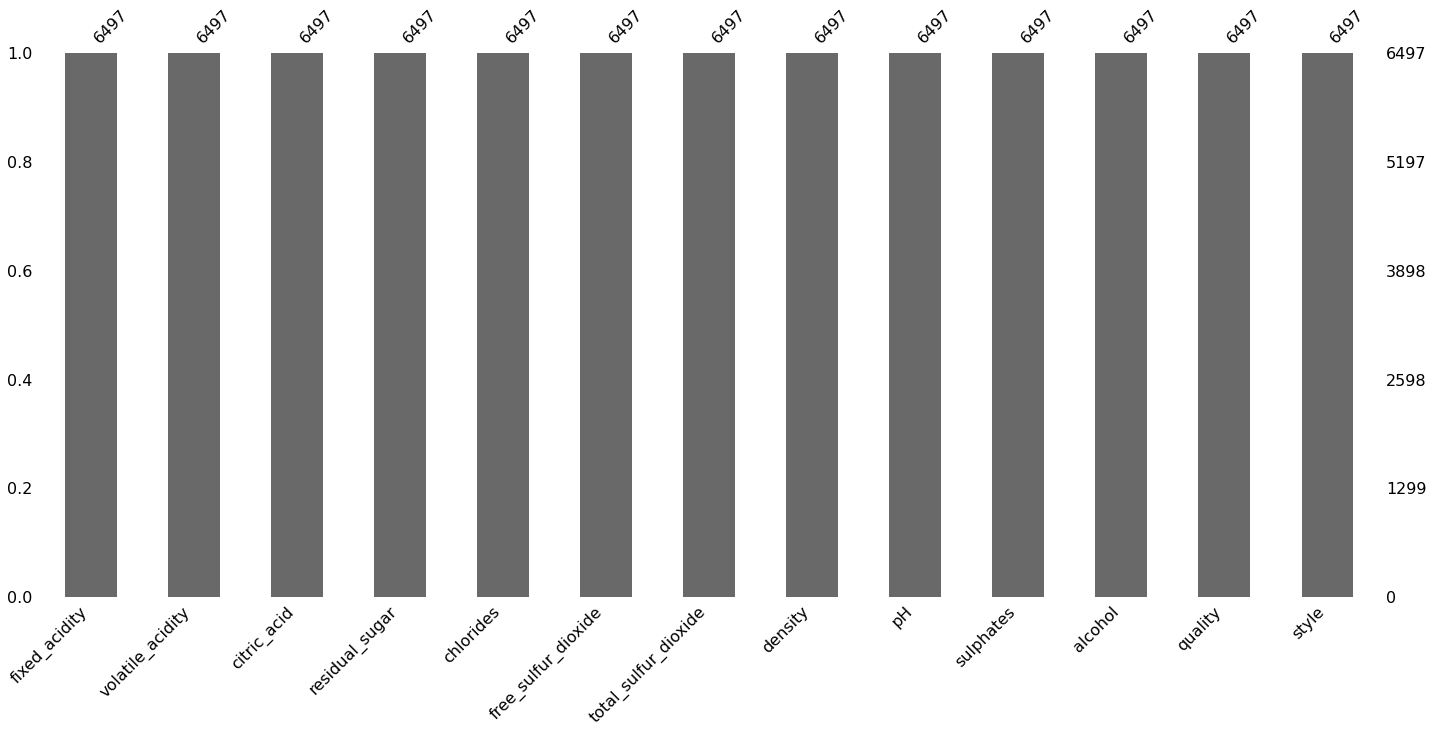

In [94]:
p=msno.bar(wd)

### Count of each target class
* insights are :
* 1. 6497 rows
* 2. no missing data
* 3. 2 unique target values
* 4. class imabalnce exists (not equal values for both classes)

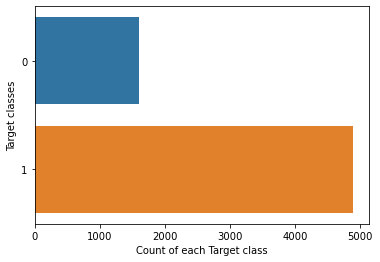

In [95]:
sns.countplot(y=wd['style'] ,data=wd)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

### Using heatmap to visualize the dataset

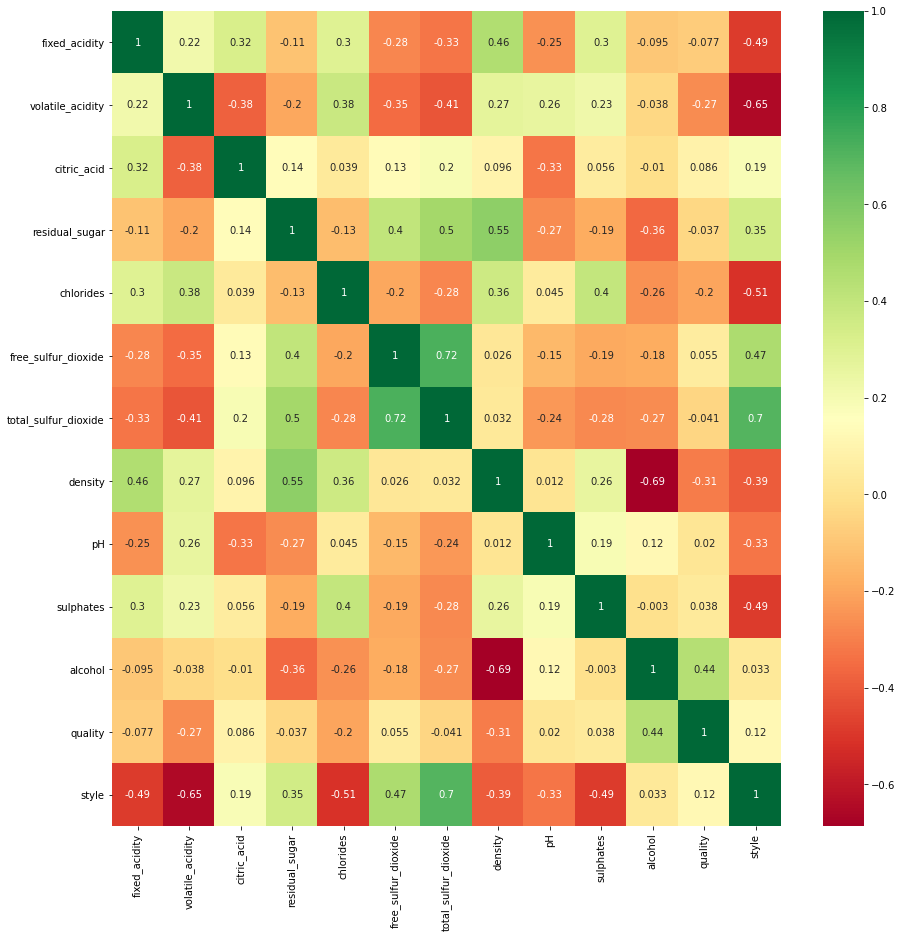

In [96]:
plt.figure(figsize=(15,15))
p=sns.heatmap(wd.corr(), annot=True,cmap='RdYlGn') 

# PCA - Unsupervised method for dimensionality reduction

In [252]:
X = wd.drop(['style'],axis=1)
y = wd['style']

### Splitting the dataset into training and testing

In [253]:
scaler = MinMaxScaler()
X=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

### KNN Classifier on the given dataset without PCA

In [260]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score before PCA : ",knn.score(X_train,y_train),"%")
print("Test score before PCA  : ",knn.score(X_test,y_test),"%")

Train score before PCA :  0.7668792610512426 %
Test score before PCA  :  0.718974358974359 %


### Building the PCA model and displaying the principal component values

In [255]:
pca = PCA(n_components=2)
principalComponents_pca = pca.fit_transform(X)
wd_pc_df = pd.DataFrame(data = principalComponents_pca
             , columns = ['principal component 1', 'principal component 2'])
wd_pc_df.head()

,principal component 1,principal component 2
0,-0.100585,0.422175
1,-0.117043,0.371329
2,-0.098872,0.364301
3,-0.060295,0.126343
4,-0.100585,0.422175


### Amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace for PCA

In [256]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.30608027 0.22294158]


### Vsualizing the Principal Components

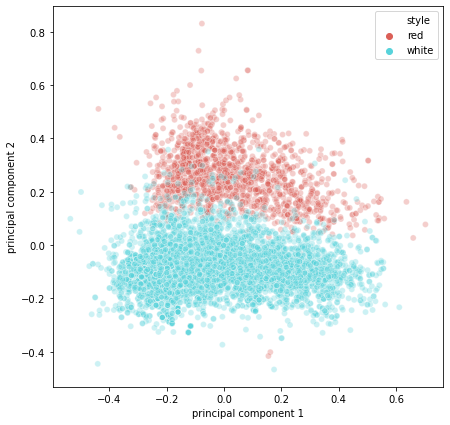

In [257]:
import seaborn as sns
plt.figure(figsize=(7,7))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue=y,
    palette=sns.color_palette("hls", 2),
    data=wd_pc_df,
    legend="full",
    alpha=0.3
)

### KNN Classifier on the PCA Model

In [258]:
X_train_new, X_test_new, y_train, y_test = train_test_split(principalComponents_pca, y, test_size = 0.3, random_state=0, stratify=y)
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA :",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA  :",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA : 0.974048823400044 %
Test score after PCA  : 0.9764102564102564 %


### Final results for PCA 

In [261]:
model_cm = metrics.confusion_matrix(y_test, y_pred)
print("Train score before PCA : ",knn.score(X_train,y_train),"%")
print("Test score before PCA  : ",knn.score(X_test,y_test),"%")
print("Train score after PCA  :",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA   :",knn_pca.score(X_test_new,y_test),"%")

Train score before PCA :  0.7668792610512426 %
Test score before PCA  :  0.718974358974359 %
Train score after PCA  : 0.974048823400044 %
Test score after PCA   : 0.9764102564102564 %


# LDA - Supervised method for dimensionality reduction

In [226]:
X = wd.drop(['style'],axis=1)
y = wd['style']

### Splitting the dataset into train and test

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Random Forest Classifier on the dataset without LDA

In [228]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
a = str(accuracy_score(y_test, y_pred))
print('Accuracy after LDA: ', a)

Accuracy after LDA:  0.9753846153846154


### Building the LDA Model

In [229]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

### KNN Classifier on the LDA Model

In [230]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
b = str(accuracy_score(y_test, y_pred))
print('Accuracy after LDA: ', b)

Accuracy after LDA:  0.9938461538461538


### Final Results for LDA

Accuracy before LDA :  0.9753846153846154
Accuracy after LDA  :  0.9938461538461538
Confusion Matrix after LDA  : 
 [[309   2]
 [  6 983]]


Text(0.5, 257.44, 'Predicted label')

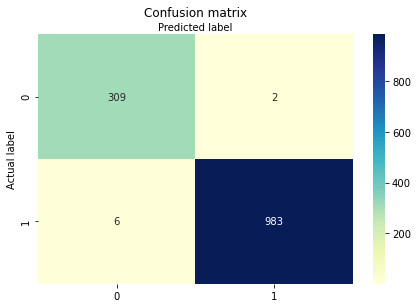

In [237]:
model_cm = metrics.confusion_matrix(y_test, y_pred)
print('Accuracy before LDA : ', a)
print('Accuracy after LDA  : ', b)
print('Confusion Matrix after LDA  : \n', model_cm)
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(model_cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# ---------------------------------------------------------------------------------------------------------------